# Hate Speech Detection

## 1. Title
Hate Speech Detection using Machine Learning

## 2. Problem Definition
The task is a **classification** problem where the goal is to identify whether a given text contains hate speech or not.

## 3. Data
The data involves sourcing hate speech related datasets. Parameters include various textual features and labels indicating hate speech presence.

## 4. Evaluation
The evaluation metric defined for this project includes:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**

## 5. Features
Features include textual content and engineered features such as word count, sentiment scores, etc.

## 6. Preparing the Tools

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

## 7. Load Data

In [17]:
# Load the dataset
df = pd.read_csv('/content/hate_speech_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## 8. Data Exploration (Exploratory Data Analysis or EDA)

### What question(s) are you trying to solve?
Identifying texts containing hate speech.

### What kind of data do you have and how do you treat different types?
The data is primarily text-based.

### What is missing from the data and how do you deal with it?
Handle missing data by imputing or dropping as necessary.

### Compare different columns to each other, compare them to the target variable, and correlation between independent variables.


In [18]:
# Checking for missing values
df.isnull().sum()

df["labels"] = df["class"].map({0: "Hate Speech",
                                   1: "Offensive Language",
                                   2: "No Hate and Offensive"})

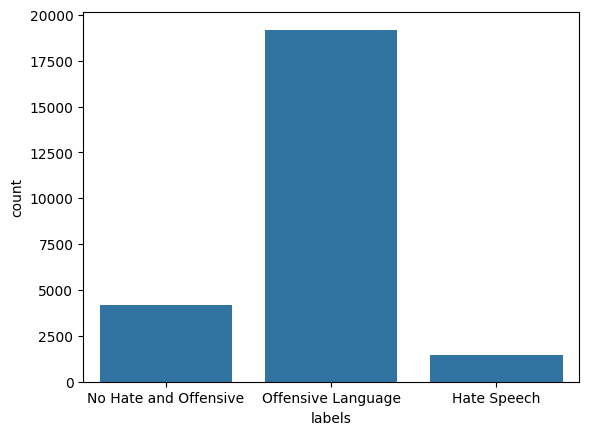

In [19]:
# Visualizing class distribution
sns.countplot(x=df['labels'])
plt.show()

## 9. Modelling

In [20]:
# Features and labels
X = df["tweet"]
y = df["labels"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing text data
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Model training
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vect, y_train)

# Predictions
rf_pred = rf_model.predict(X_test_vect)



## 10. Evaluating the Model

                       precision    recall  f1-score   support

          Hate Speech       0.41      0.10      0.16       290
No Hate and Offensive       0.83      0.83      0.83       835
   Offensive Language       0.91      0.96      0.93      3832

             accuracy                           0.89      4957
            macro avg       0.71      0.63      0.64      4957
         weighted avg       0.87      0.89      0.87      4957



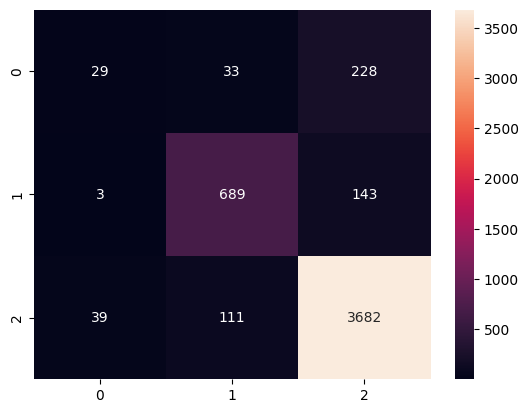

Accuracy: 0.8876336493847085


In [22]:
# Classification report
print(classification_report(y_test, rf_pred))

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy: {accuracy}')